---
# EDA

---

There are 5 nos. of following CSV files downloaded from Kaggle:

    Telemetry Time Series Data (PdM_telemetry.csv).
    Error (PdM_errors.csv).
    Maintenance (PdM_maint.csv).
    Failures (PdM_failures.csv).
    Metadata of Machines (PdM_Machines.csv).

## Telemetry Time Series Data (PdM_telemetry.csv):
    Telemetry is the automated communication processes from multiple datasources. It consists of hourly average of voltage, rotation, pressure, vibration collected from 100 machines for the year 2015.

In [1]:
import pandas as pd
import numpy as np

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
import datetime as dt

## EDA of the Telemetry Time Series Data

In [5]:
telemetry = pd.read_csv("0_Dataset/PdM_telemetry.csv")

In [6]:
telemetry.head()

,datetime,machineID,volt,rotate,pressure,vibration
0,2015-01-01 06:00:00,1,176.217853,418.504078,113.077935,45.087686
1,2015-01-01 07:00:00,1,162.879223,402.747490,95.460525,43.413973
2,2015-01-01 08:00:00,1,170.989902,527.349825,75.237905,34.178847
3,2015-01-01 09:00:00,1,162.462833,346.149335,109.248561,41.122144
4,2015-01-01 10:00:00,1,157.610021,435.376873,111.886648,25.990511


### Descriptive statistic

In [7]:
telemetry.describe()

,machineID,volt,rotate,pressure,vibration
count,876100.000000,876100.000000,876100.000000,876100.000000,876100.000000
mean,50.500000,170.777736,446.605119,100.858668,40.385007
std,28.866087,15.509114,52.673886,11.048679,5.370361
min,1.000000,97.333604,138.432075,51.237106,14.877054
25%,25.750000,160.304927,412.305714,93.498181,36.777299
50%,50.500000,170.607338,447.558150,100.425559,40.237247
75%,75.250000,181.004493,482.176600,107.555231,43.784938
max,100.000000,255.124717,695.020984,185.951998,76.791072


In [8]:
telemetry.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 876100 entries, 0 to 876099
Data columns (total 6 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   datetime   876100 non-null  object 
 1   machineID  876100 non-null  int64  
 2   volt       876100 non-null  float64
 3   rotate     876100 non-null  float64
 4   pressure   876100 non-null  float64
 5   vibration  876100 non-null  float64
dtypes: float64(4), int64(1), object(1)
memory usage: 40.1+ MB


## Formatting Datetime

In [9]:
telemetry['datetime'] = pd.to_datetime(telemetry['datetime'])

In [10]:
telemetry['datetime'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 876100 entries, 0 to 876099
Series name: datetime
Non-Null Count   Dtype         
--------------   -----         
876100 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 6.7 MB


### How many Machines are there?

In [11]:
telemetry['machineID'].nunique()

100

### What is the duration of the data?

In [12]:
telemetry['datetime'].describe()

count                  876100
unique                   8761
top       2015-01-01 06:00:00
freq                      100
first     2015-01-01 06:00:00
last      2016-01-01 06:00:00
Name: datetime, dtype: object

##### Observation: 
    Telemetry data is distributed between 1st Jan 2015 to 1st Jan 2016. It seems that the data is having hourly frequency

### Are there any missing days in the data?

In [13]:
import datetime

In [14]:
pd.date_range(start = "2015-01-01 06:00:00", end = "2016-01-01 06:00:00",freq='H').difference(telemetry['datetime'])

DatetimeIndex([], dtype='datetime64[ns]', freq=None)

##### Observation : 
    There is no missing data as per the DateTime

###  Are there any duplicates?

In [15]:
telemetry.duplicated().value_counts()

False    876100
dtype: int64

##### Observation : 
    There are no duplicates in the telemetry data.

### Are there any duplicate entry against machineId and datetime?

In [16]:
telemetry[['machineID','datetime']].duplicated().value_counts()

False    876100
dtype: int64

##### Observation : 
    There are no duplicates in the telemetry data against machineID and DateTime

### Are there any Null values in the data?

In [17]:
telemetry.isnull().value_counts()

datetime  machineID  volt   rotate  pressure  vibration
False     False      False  False   False     False        876100
dtype: int64

##### Observation : 
    There are no missing values in the data

## Vibration of Machine ID 55 for 2015

In [18]:
df_vib_machine55 = telemetry[telemetry['machineID']==55][['datetime', 'vibration']].set_index('datetime')

In [19]:
df_vib_machine55.head()

,vibration
datetime,
2015-01-01 06:00:00,29.985309
2015-01-01 07:00:00,41.055841
2015-01-01 08:00:00,33.557505
2015-01-01 09:00:00,44.772491
2015-01-01 10:00:00,39.175556


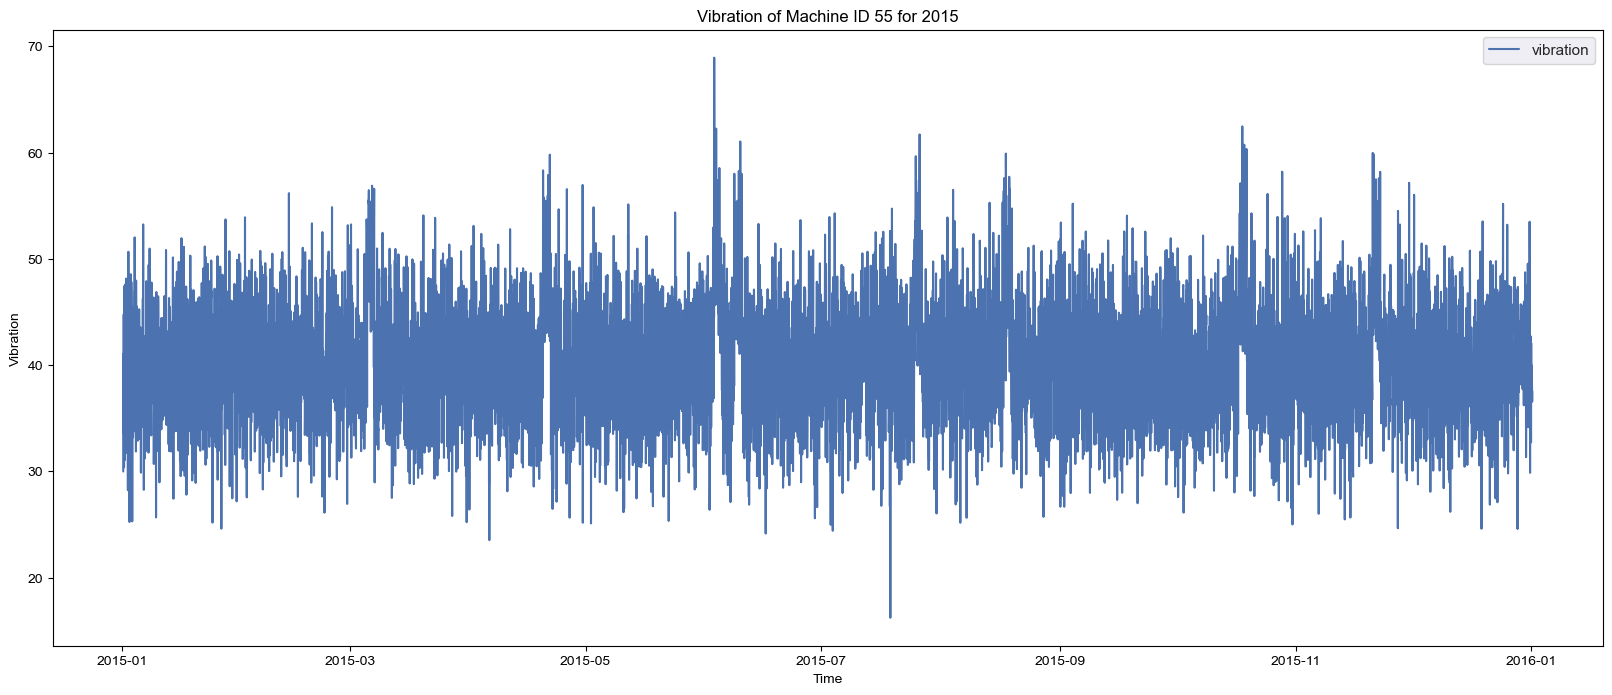

In [20]:
plt.figure(figsize=(20,8))
plt.title('Vibration of Machine ID 55 for 2015')
plt.ylabel("Vibration")
plt.xlabel("Time")


sns.set(style="darkgrid")
g = sns.lineplot(data = df_vib_machine55)

##### Observation : 
    
    The Highest vibration is 70 (approx.) for machine ID=55 in 2015.
    The Lowest  vibration is 15 (approx.) for machine ID=55 in 2015.

## Sample of Distribution Plot of Voltage - Jan2015

In [21]:
df_volt = telemetry [(telemetry['machineID'] ==1) &
                    (telemetry['datetime']>pd.to_datetime('2015-01-01')) &
                    (telemetry['datetime']<pd.to_datetime('2015-02-01'))]

In [22]:
df_volt.head()

,datetime,machineID,volt,rotate,pressure,vibration
0,2015-01-01 06:00:00,1,176.217853,418.504078,113.077935,45.087686
1,2015-01-01 07:00:00,1,162.879223,402.747490,95.460525,43.413973
2,2015-01-01 08:00:00,1,170.989902,527.349825,75.237905,34.178847
3,2015-01-01 09:00:00,1,162.462833,346.149335,109.248561,41.122144
4,2015-01-01 10:00:00,1,157.610021,435.376873,111.886648,25.990511


In [23]:
df_volt_Jan2015 = df_volt[['datetime', 'volt']].set_index('datetime')

In [24]:
df_volt_Jan2015.head()

,volt
datetime,
2015-01-01 06:00:00,176.217853
2015-01-01 07:00:00,162.879223
2015-01-01 08:00:00,170.989902
2015-01-01 09:00:00,162.462833
2015-01-01 10:00:00,157.610021


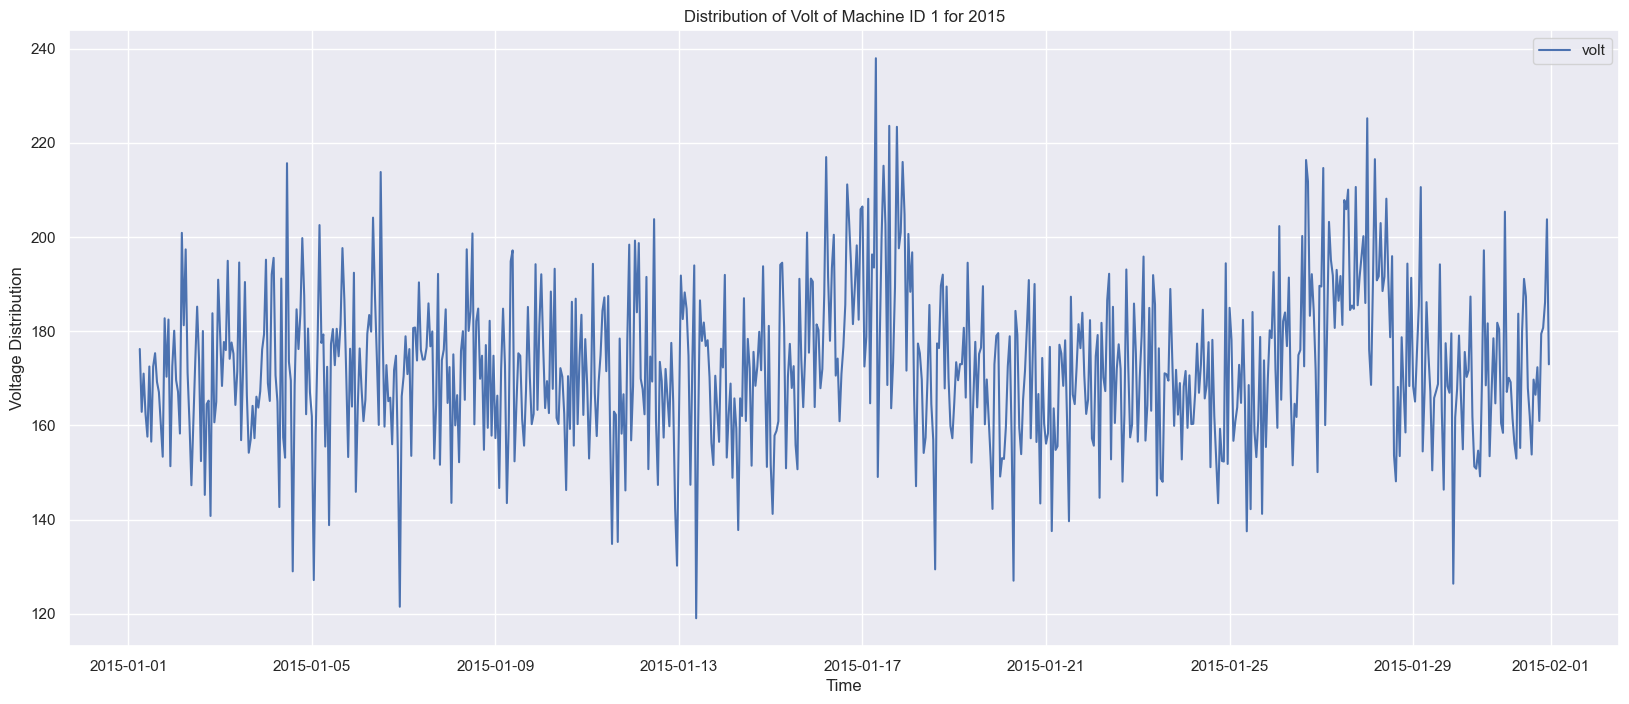

In [25]:
plt.figure(figsize=(20,8))
plt.title('Distribution of Volt of Machine ID 1 for 2015')
plt.ylabel("Voltage Distribution")
plt.xlabel("Time")

sns.set(style="darkgrid")
g = sns.lineplot(data = df_volt_Jan2015)

##### Observation : 
    
    The Highest voltage is 240 (approx.) for machine ID=1 during the period.
    The Lowest voltage is 120 for machine ID=1 during the period.

## Distribution of Voltage across Machines

<AxesSubplot:title={'center':'Voltage Distribution Accross Machines'}, xlabel='volt', ylabel='Count'>

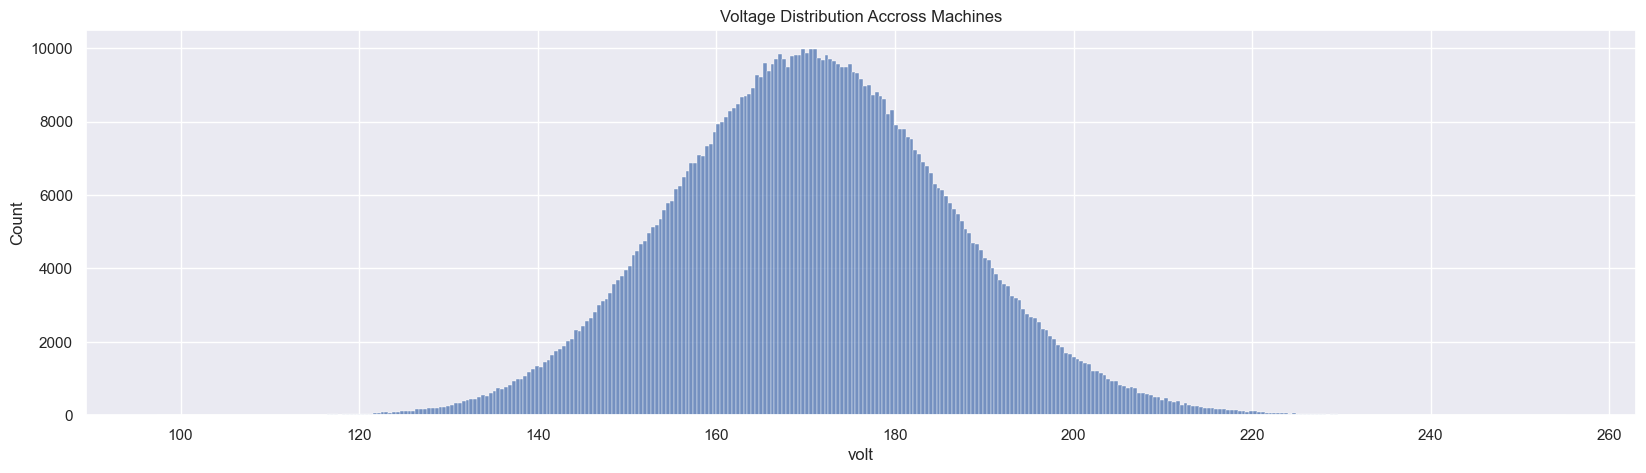

In [26]:
plt.figure(figsize=(20,5))
plt.title('Voltage Distribution Accross Machines')

sns.set(style="darkgrid")
sns.histplot(data = telemetry, x = 'volt')

##### Observation : 
    The distribution of ‘volt’ looks like a normal distribution.

## Distribution of Other Parameters accross Machines

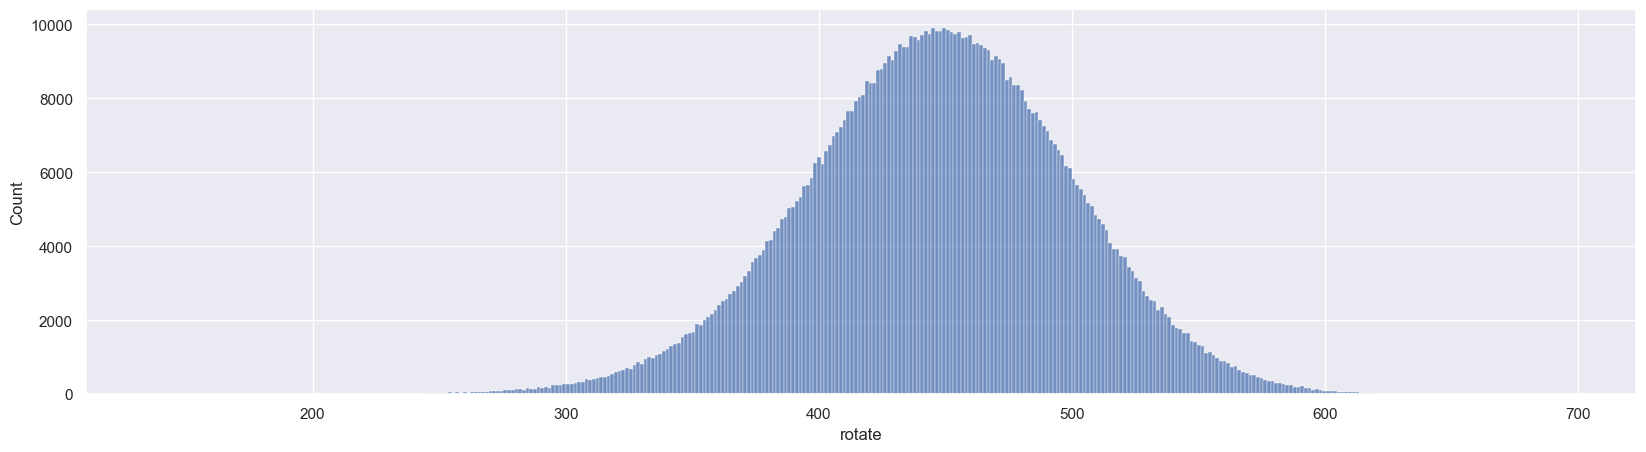

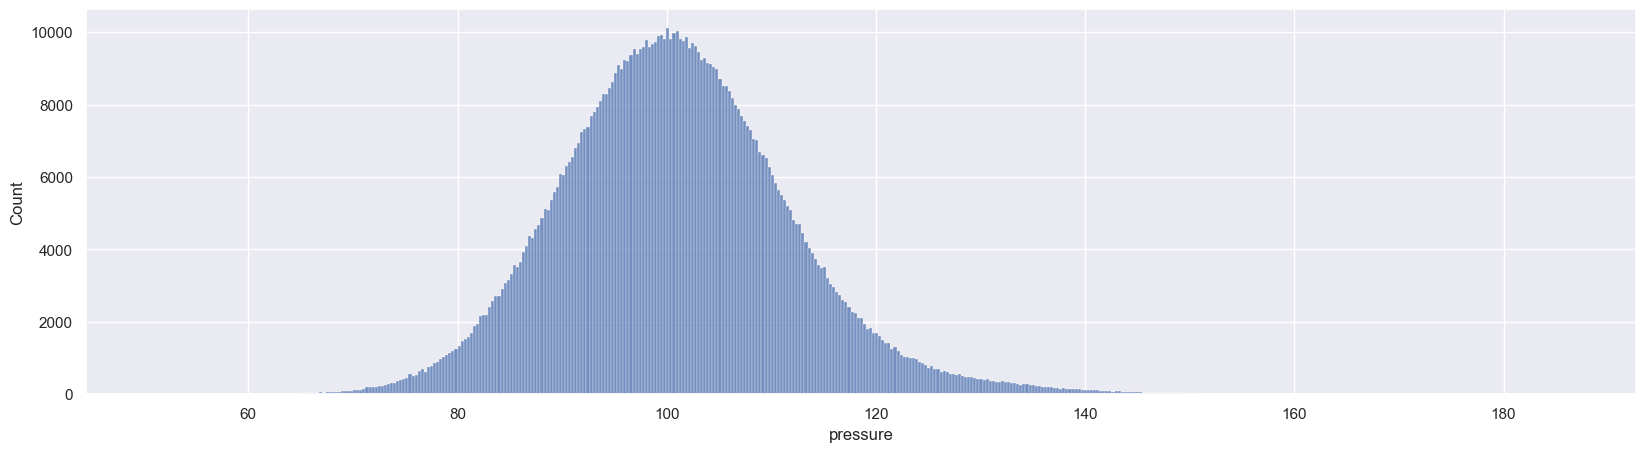

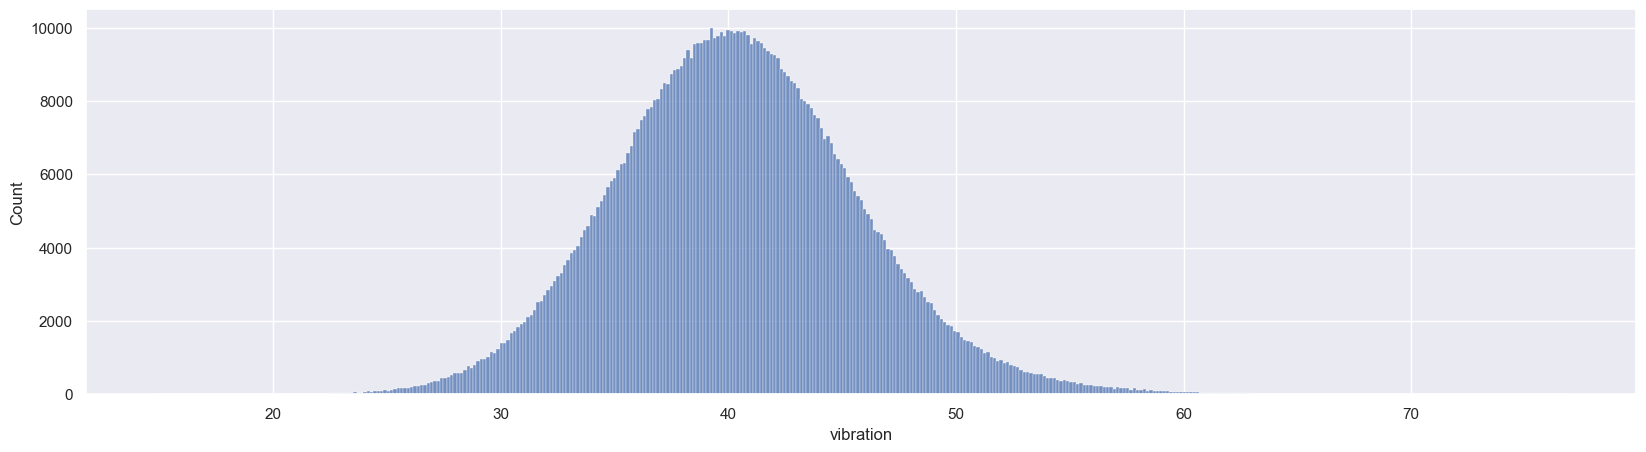

In [27]:
for i in ['rotate', 'pressure', 'vibration']:
    plt.figure(figsize=(20,5))
    sns.histplot(data = telemetry, x = i)

### Observations on Telemetry Data:

    1. The data distributed between 1st Jan 2015 to 1st Jan 2016.
    2. Each row represents the state of a machine on a particular hour. Voltage, vibration, pressure & rotation of a machine have beenaveraged hourly.
    3. There are 100 unique Machines.
    4. There are no duplicates or missing values in the dataset.
    5. The four parameters voltage, vibration, pressure & rotation are normally distributed.

---

## Error (PdM_errors.csv):
These are errors encountered by the machines while in operating condition. Since, these errors don't shut down the machines, these are not considered as failures. The error date and times are rounded to the closest hour since thetelemetry data is collected at an hourly rate.

In [28]:
errors = pd.read_csv('0_Dataset/PdM_errors.csv')

In [29]:
errors.head()

,datetime,machineID,errorID
0,2015-01-03 07:00:00,1,error1
1,2015-01-03 20:00:00,1,error3
2,2015-01-04 06:00:00,1,error5
3,2015-01-10 15:00:00,1,error4
4,2015-01-22 10:00:00,1,error4


In [30]:
errors.describe()

,machineID
count,3919.000000
mean,51.044654
std,28.954988
min,1.000000
25%,25.000000
50%,51.000000
75%,77.000000
max,100.000000


In [31]:
errors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3919 entries, 0 to 3918
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   datetime   3919 non-null   object
 1   machineID  3919 non-null   int64 
 2   errorID    3919 non-null   object
dtypes: int64(1), object(2)
memory usage: 92.0+ KB


### Format Datetime Fields as Datetime from String

In [32]:
errors['datetime'] = pd.to_datetime(errors['datetime'])

In [33]:
errors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3919 entries, 0 to 3918
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   datetime   3919 non-null   datetime64[ns]
 1   machineID  3919 non-null   int64         
 2   errorID    3919 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 92.0+ KB


##### Observation: 
    We don't have any null values in Dataset

### Are there any duplicates?
    One Machine should not have multiple errors with the same time stamp

In [34]:
errors.duplicated().value_counts()

False    3919
dtype: int64

##### Observation : 
    There are no duplicates in the telemetry data.

### Plotting the Histogram of Errors

<AxesSubplot:title={'center':'Plotting the Histogram of Errors'}, xlabel='errorID', ylabel='count'>

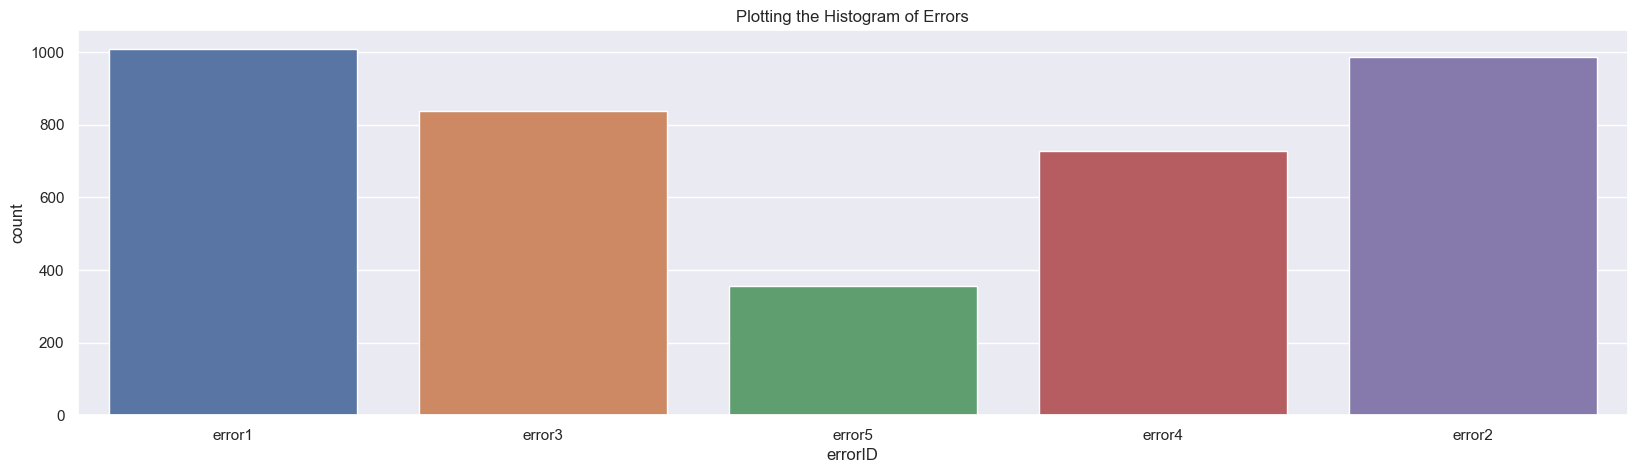

In [35]:
plt.figure(figsize=(20,5))
plt.title('Plotting the Histogram of Errors')

sns.set(style="darkgrid")
sns.countplot(errors['errorID'])

##### Observation:
    Type 1 & 2 errors are most frequent

---

## Maintenance (PdM_maint.csv):

    If a component of a machine is replaced, that is captured as a record in this table. Components are replaced under two situations:
 
 
    1. During the regular scheduled visit, the technician replaced it (Proactive Maintenance)
    
    2. A component breaks down and then the technician does an unscheduled maintenance to replace the component (ReactiveMaintenance). This is considered as a failure and corresponding data is captured under Failures. Maintenance data has both2014 and 2015 records. This data is rounded to the closest hour since the telemetry data is collected at an hourly rate.

In [36]:
maint = pd.read_csv('0_Dataset/PdM_maint.csv')

In [37]:
maint.head()

,datetime,machineID,comp
0,2014-06-01 06:00:00,1,comp2
1,2014-07-16 06:00:00,1,comp4
2,2014-07-31 06:00:00,1,comp3
3,2014-12-13 06:00:00,1,comp1
4,2015-01-05 06:00:00,1,comp4


In [38]:
maint.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3286 entries, 0 to 3285
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   datetime   3286 non-null   object
 1   machineID  3286 non-null   int64 
 2   comp       3286 non-null   object
dtypes: int64(1), object(2)
memory usage: 77.1+ KB


### Format Datetime Fields as Datetime from String

In [39]:
maint['datetime'] = pd.to_datetime(maint['datetime'])

In [40]:
maint.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3286 entries, 0 to 3285
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   datetime   3286 non-null   datetime64[ns]
 1   machineID  3286 non-null   int64         
 2   comp       3286 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 77.1+ KB


<AxesSubplot:title={'center':'Histogram of Replaced Components'}, xlabel='comp', ylabel='count'>

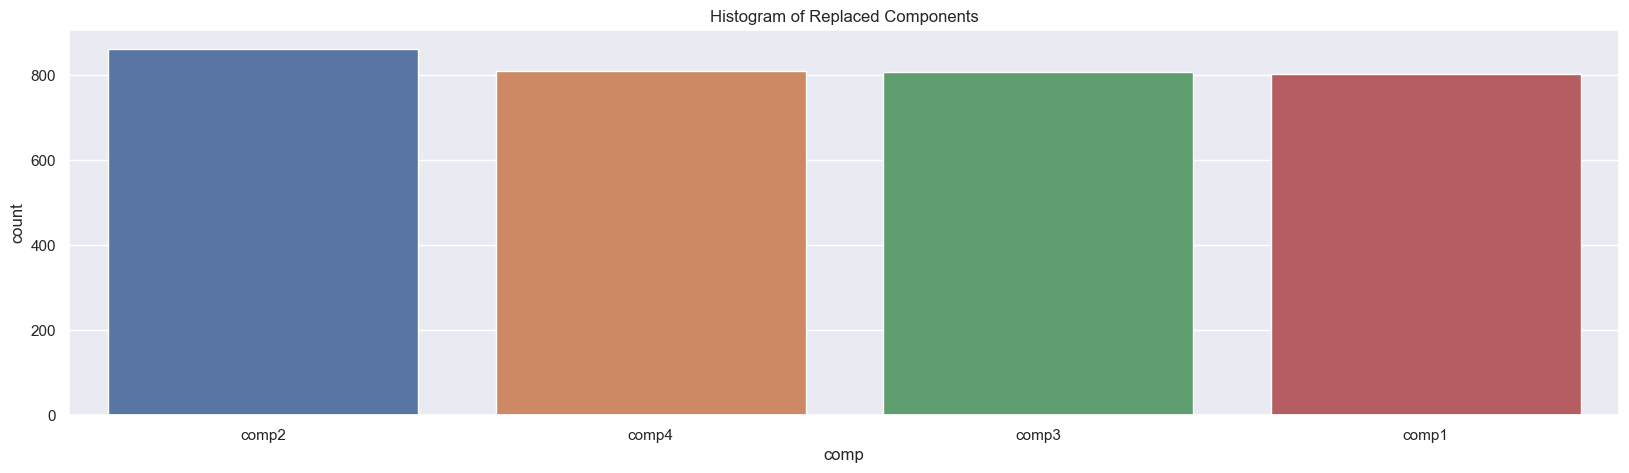

In [41]:
plt.figure(figsize=(20,5))
plt.title('Histogram of Replaced Components')
sns.set(style="darkgrid")

sns.countplot(x = maint['comp'])

##### Observation:
    Four types components are replaced almost in the same numbers.

### What is the duration of the data?

In [42]:
maint['datetime'].describe(datetime_is_numeric=True)

count                             3286
mean     2015-05-30 14:40:36.518563840
min                2014-06-01 06:00:00
25%                2015-03-03 06:00:00
50%                2015-06-13 06:00:00
75%                2015-09-18 00:00:00
max                2016-01-01 06:00:00
Name: datetime, dtype: object

##### Observation:
    Maintenance data is present June 2014 onwards.This is different from other data which are present between 2014 and 2015.

### Plot number of maintenance records across months

<AxesSubplot:xlabel='datetime', ylabel='count'>

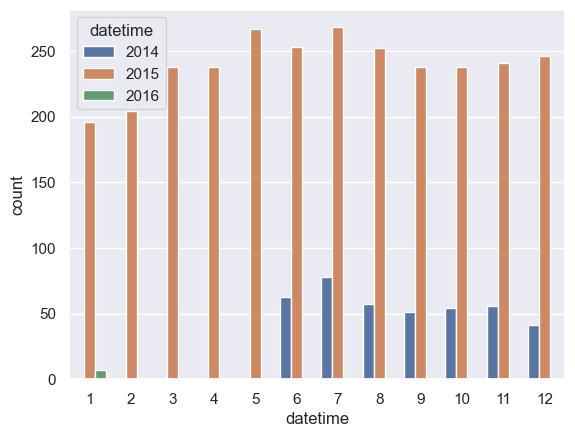

In [43]:
sns.countplot(x = maint['datetime'].dt.month, hue = maint['datetime'].dt.year)

##### Observation:

    1.Maintenance records are available from June'2014 to January'2016.
    2.Number of components replaced in the year 2015 are considerably higher compared to the 2014.
    3.In 2015, number of maintenance records are the highest in May and July month.
    4.We can ignore the data for 2016 (since we have only one day's data).

### Plot the number of Maintenance Records Across Machines

<AxesSubplot:title={'center':'Histogram of Replaced Components'}, xlabel='count', ylabel='machineID'>

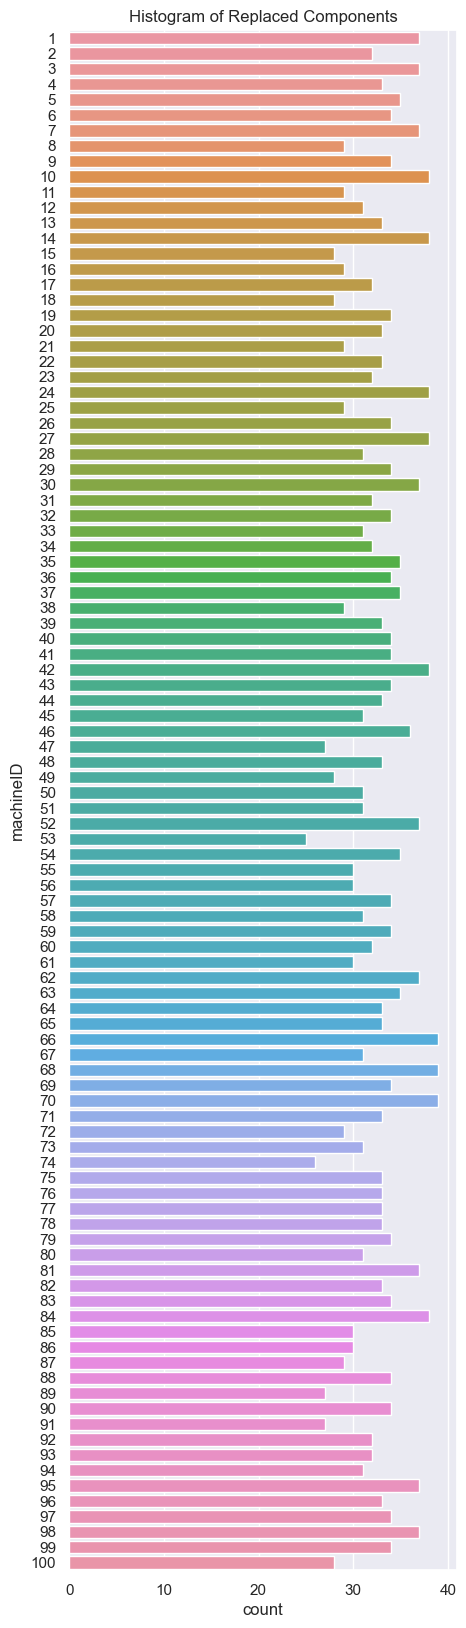

In [44]:
plt.figure(figsize=(5, 20))
plt.title('Histogram of Replaced Components')
sns.set(style="darkgrid")
sns.countplot(y = maint['machineID'])

##### Observation:
    1.Machine ID-66, 68 & 70 are the highest number of Maintenance Records machines.
    2.Machine ID-53 is the lowest number of Maintenance Record machine

---

## Metadata of Machines (PdM_Machines.csv)

    This data set includes some information about the machines: model type and age (years in service).

In [45]:
machines = pd.read_csv('0_Dataset/PdM_machines.csv')

In [46]:
machines.head()

,machineID,model,age
0,1,model3,18
1,2,model4,7
2,3,model3,8
3,4,model3,7
4,5,model3,2


### Check the Null values

In [47]:
machines.isnull().value_counts()

machineID  model  age  
False      False  False    100
dtype: int64

In [48]:
machines.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   machineID  100 non-null    int64 
 1   model      100 non-null    object
 2   age        100 non-null    int64 
dtypes: int64(2), object(1)
memory usage: 2.5+ KB


##### Observation:
    No Null Values are there

### Check the Duplicate Entries

In [49]:
machines.duplicated().value_counts()

False    100
dtype: int64

##### Observation:
    No Duplicate Entries are there

### Histogram of Machine MetaData

<AxesSubplot:xlabel='age', ylabel='count'>

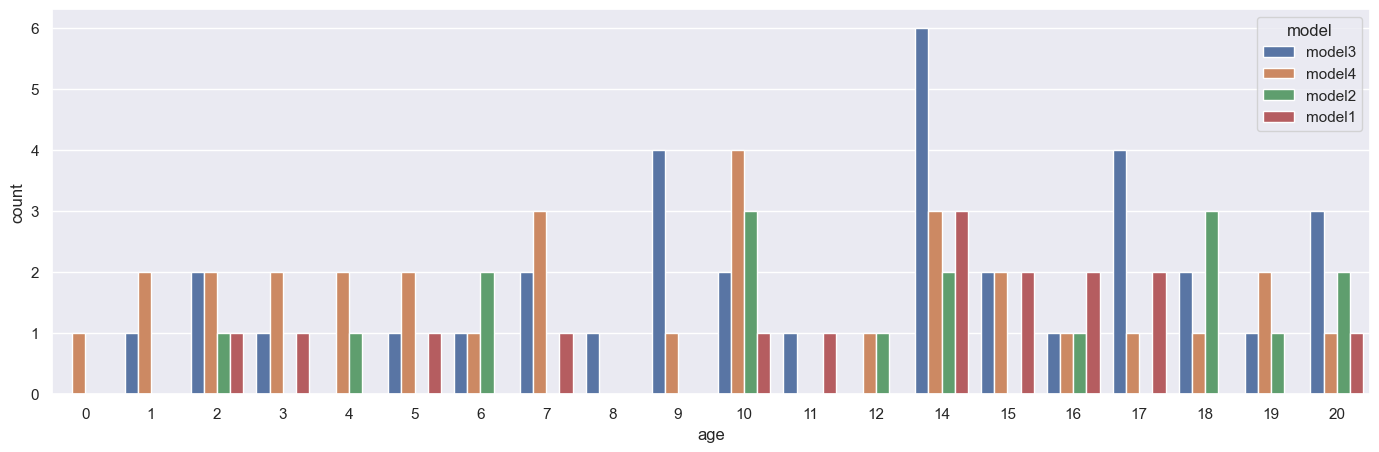

In [50]:
plt.figure(figsize=(17,5))
sns.countplot(x = machines['age'], hue=machines['model'])

##### Observation:
    For machine age having around 10 years, numbers of model-4 have the highest
    For machine age having around 20 years, numbers of model-3 have the highest

---

## Failures (PdM_failures.csv)
    These are the records of component replacements due to failures. Each record has a date and time, machine ID, and failedcomponent type.

In [51]:
failures = pd.read_csv("0_Dataset/PdM_failures.csv")

In [52]:
failures.head()

,datetime,machineID,failure
0,2015-01-05 06:00:00,1,comp4
1,2015-03-06 06:00:00,1,comp1
2,2015-04-20 06:00:00,1,comp2
3,2015-06-19 06:00:00,1,comp4
4,2015-09-02 06:00:00,1,comp4


### Check Null Values

In [53]:
failures.isnull().value_counts()

datetime  machineID  failure
False     False      False      761
dtype: int64

In [54]:
failures.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 761 entries, 0 to 760
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   datetime   761 non-null    object
 1   machineID  761 non-null    int64 
 2   failure    761 non-null    object
dtypes: int64(1), object(2)
memory usage: 18.0+ KB


### Check Duplicate Values

In [55]:
failures.duplicated().value_counts()

False    761
dtype: int64

### Histogram of Component Failure

<AxesSubplot:title={'center':'Histogram of Replaced Components'}, xlabel='failure', ylabel='count'>

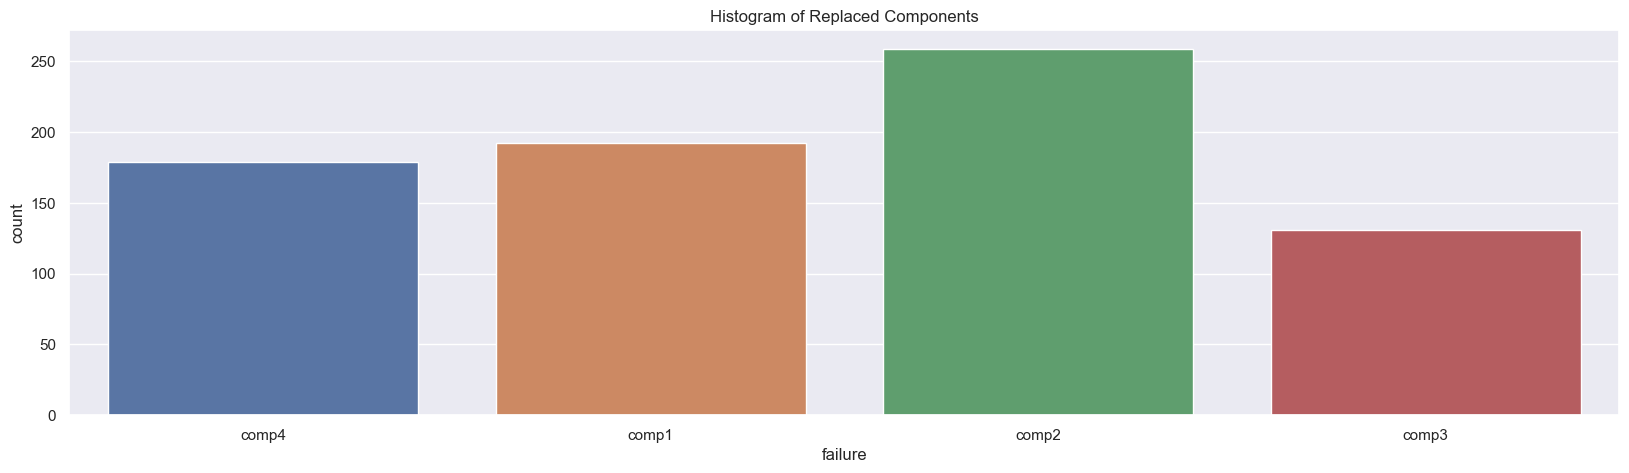

In [56]:
plt.figure(figsize=(20,5))
plt.title('Histogram of Replaced Components')
sns.set(style="darkgrid")

sns.countplot(failures['failure'])

##### Observation: 
    Most failures happen due to component 2.

---

# Combined Data Frame
---

## Create a DF with number of errors, maintenance and failure records across machines

In [57]:
errors_across_machine = errors.groupby('machineID').size()
errors_across_machine = pd.DataFrame(errors_across_machine, columns=['num_errors']).reset_index()

In [58]:
errors_across_machine.head()

,machineID,num_errors
0,1,35
1,2,28
2,3,39
3,4,31
4,5,38


In [59]:
maint_across_machine = maint.groupby('machineID').size()
maint_across_machine = pd.DataFrame(maint_across_machine, columns=['num_maint']).reset_index()

In [60]:
maint_across_machine.head()

,machineID,num_maint
0,1,37
1,2,32
2,3,37
3,4,33
4,5,35


In [61]:
failure_across_machine = failures.groupby('machineID').size()
failure_across_machine = pd.DataFrame(failure_across_machine, columns=['num_failure']).reset_index()

In [62]:
failure_across_machine.head()

,machineID,num_failure
0,1,7
1,2,4
2,3,5
3,4,6
4,5,7


In [63]:
machines_error_df = pd.merge(machines, errors_across_machine, how= 'left', on = 'machineID')

In [64]:
machines_error_df.head()

,machineID,model,age,num_errors
0,1,model3,18,35
1,2,model4,7,28
2,3,model3,8,39
3,4,model3,7,31
4,5,model3,2,38


In [65]:
machines_error_df = pd.merge(machines_error_df, maint_across_machine, how='left', on='machineID')

In [66]:
machines_error_df.head()

,machineID,model,age,num_errors,num_maint
0,1,model3,18,35,37
1,2,model4,7,28,32
2,3,model3,8,39,37
3,4,model3,7,31,33
4,5,model3,2,38,35


In [67]:
machines_error_df = pd.merge(machines_error_df, failure_across_machine, how='left', on='machineID')

In [68]:
machines_error_df.head()

,machineID,model,age,num_errors,num_maint,num_failure
0,1,model3,18,35,37,7.0
1,2,model4,7,28,32,4.0
2,3,model3,8,39,37,5.0
3,4,model3,7,31,33,6.0
4,5,model3,2,38,35,7.0


### Correlation between all values

In [69]:
machines_error_df.corr()

,machineID,age,num_errors,num_maint,num_failure
machineID,1.000000,0.100196,0.107982,-0.077903,0.096496
age,0.100196,1.000000,0.106931,0.075445,0.476459
num_errors,0.107982,0.106931,1.000000,-0.026558,0.483735
num_maint,-0.077903,0.075445,-0.026558,1.000000,-0.030258
num_failure,0.096496,0.476459,0.483735,-0.030258,1.000000


### Plot Number of Errors across Machine Age

<AxesSubplot:xlabel='age', ylabel='num_errors'>

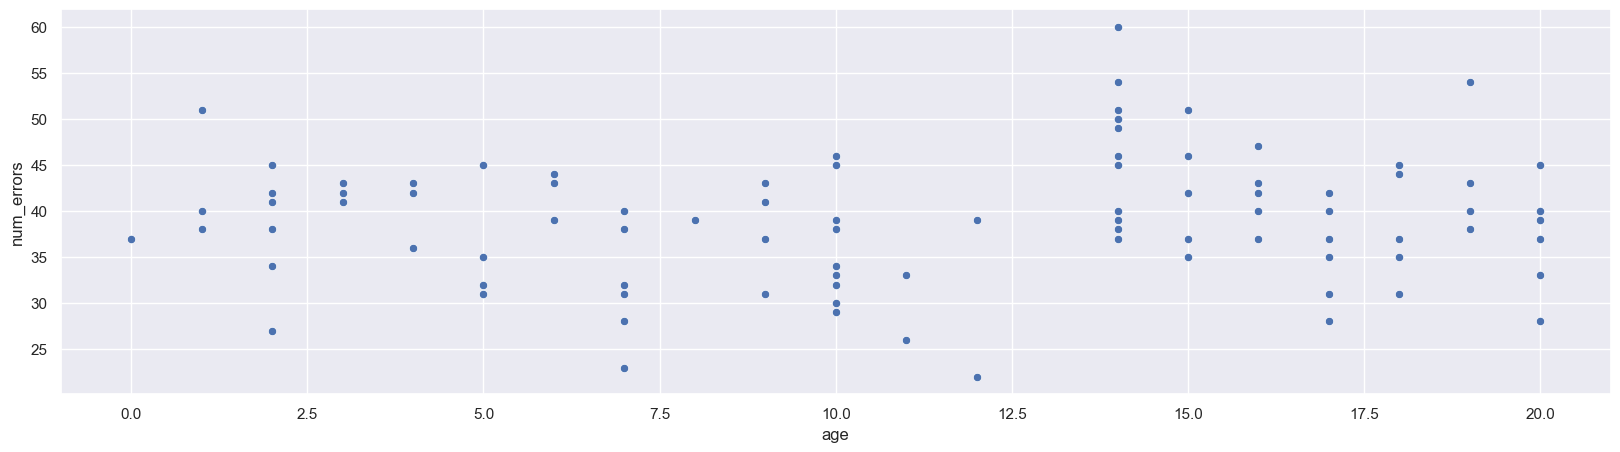

In [70]:
plt.figure(figsize=(20,5))
sns.set(style="darkgrid")
sns.scatterplot(x = machines_error_df['age'], y= machines_error_df['num_errors'])

### Plot Age vs Number of Maintenance Records

<AxesSubplot:xlabel='age', ylabel='num_maint'>

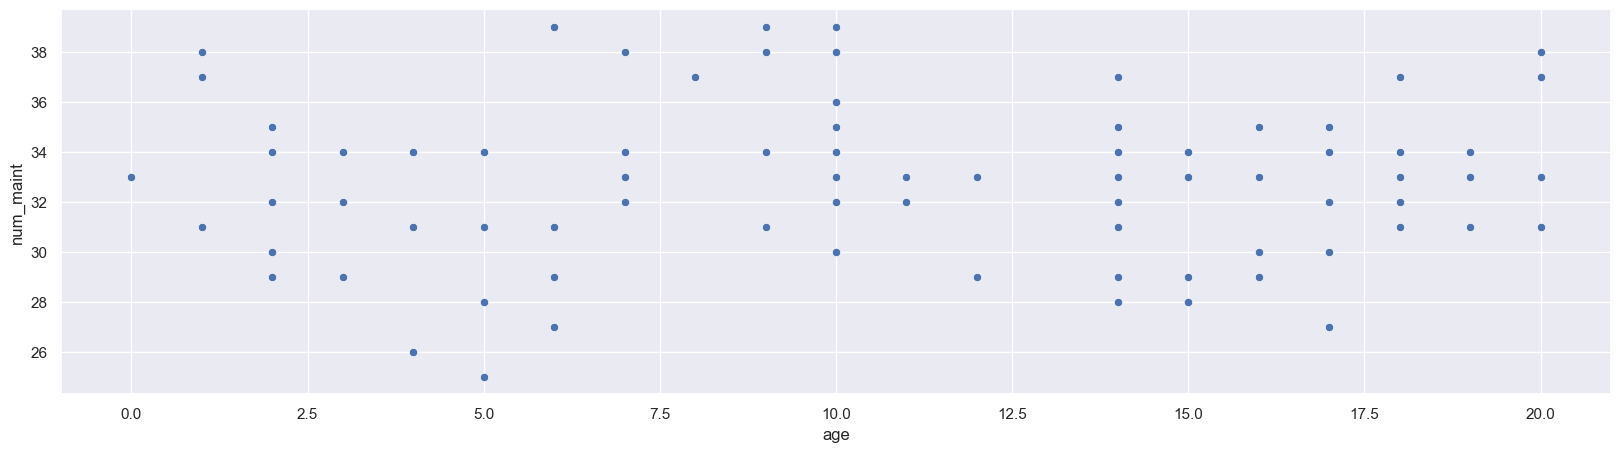

In [71]:
plt.figure(figsize=(20,5))
sns.set(style="darkgrid")
sns.scatterplot(x = machines_error_df['age'], y= machines_error_df['num_maint'])

### Plot Age vs Number of Failure Records

<AxesSubplot:xlabel='age', ylabel='num_failure'>

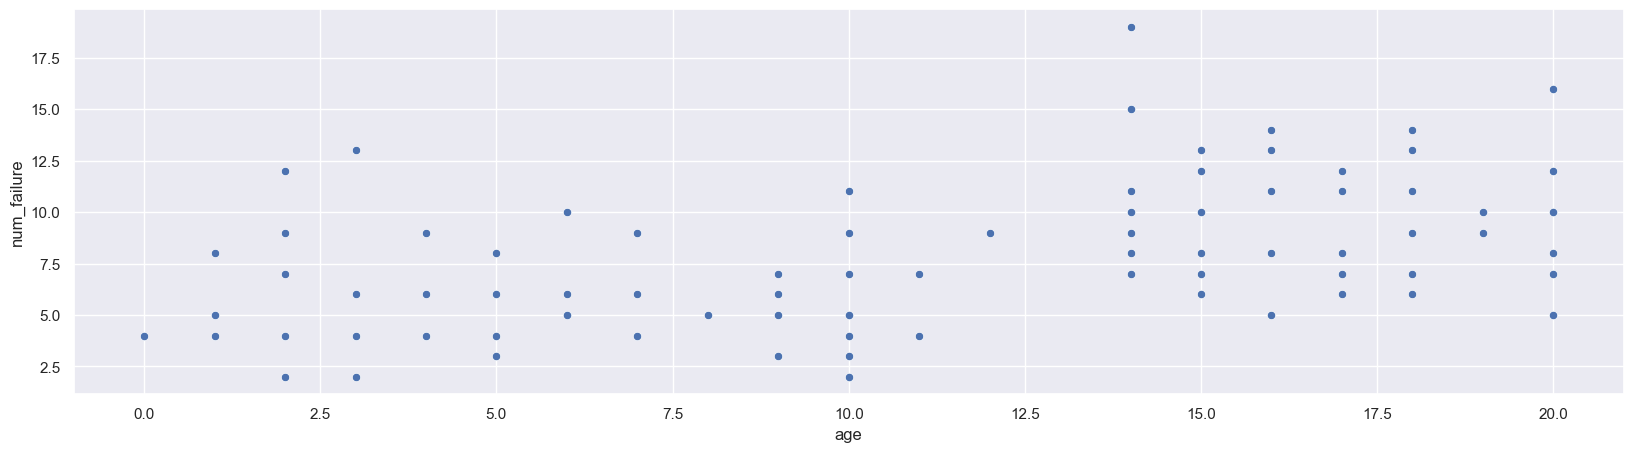

In [72]:
plt.figure(figsize=(20,5))
sns.set(style="darkgrid")
sns.scatterplot(x = machines_error_df['age'], y= machines_error_df['num_failure'])

In [73]:
machines_error_df.corr()

,machineID,age,num_errors,num_maint,num_failure
machineID,1.000000,0.100196,0.107982,-0.077903,0.096496
age,0.100196,1.000000,0.106931,0.075445,0.476459
num_errors,0.107982,0.106931,1.000000,-0.026558,0.483735
num_maint,-0.077903,0.075445,-0.026558,1.000000,-0.030258
num_failure,0.096496,0.476459,0.483735,-0.030258,1.000000


##### Observation
    From the above three plots, it appears only Number of Failures is slightly correlated with Age.
